# Adult Income Data Analysis

### Census Income dataset from UCI Machine Learning Repository

### Prediction task is to determine whether a person makes over 50K a year

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### 1. Dataset Reading and Data Pre-processing 

In [6]:
df = pd.read_csv("adult.csv")

In [7]:
df.shape 

(48842, 15)

In [66]:
df.head()     
# Displaying first 20 rows for initial observations

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,5,3217,9,12,4,0,1,4,1,26,0,39,38,0
1,33,4,3519,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,17196,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,18738,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,23828,9,12,2,9,5,2,0,0,0,39,4,0


### 1.1 handling Missing Data 

In [ ]:
# --- Datset contains missing values in form of '?'

In [10]:
# --- for removing '?' values, replacing with Null values  

In [11]:
df = df.replace('?', np.nan) 
# '?' values are replaced with Null vlaues 

In [12]:
df.isnull().any().any(), df.shape  

(True, (48842, 15))

In [13]:
df.isnull().sum(axis=0) 
# Checking how many features have Null values 

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [14]:
## The count of these Null values is not significant as compared to overall dimensions - so removing  

In [15]:
rows = df.shape[0]
# to save rows count of original dataframe 

In [16]:
df = df.dropna() 
# removing rows with missing vlaues 

In [17]:
df.isnull().any().any(), df.shape 
# to recheck if Null values are gone 

(False, (45222, 15))

In [18]:
rows - df.shape[0]   
# to check how many rows are deleted 

3620

### 1.2 Checking attributes of Features (Categorical/Numerical) 

In [20]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


## 2. EDA (Exploratory Data Analysis) and Statistical Analysis


In [21]:
df.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,45222,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33307,14783,21055,6020,18666,38903,30527,41292,34014


### 2.1 Income distribution of Greater and Less than 50K

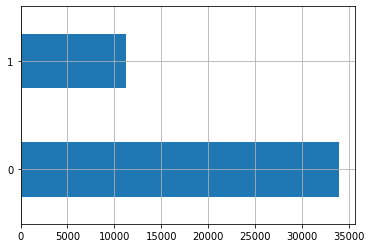

In [67]:
# plt.figure(figsize= (8,4))
df['income'].value_counts().plot(kind = 'barh',grid = True)
plt.show()

### 2.2 Details of Working Class Attributes 

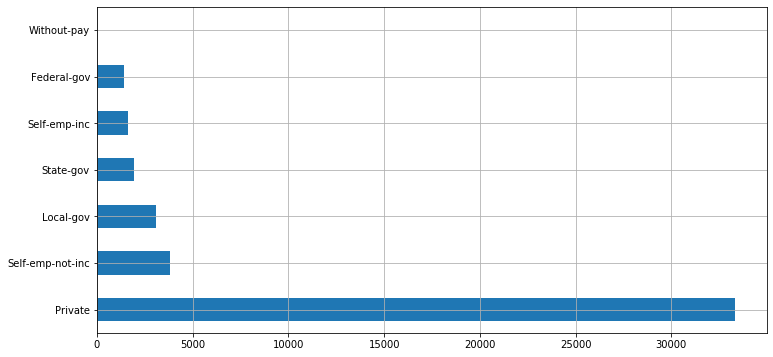

In [23]:
############ Displaying Workclass details ###########
plt.figure(figsize= (12,6))
df['workclass'].value_counts().plot(kind = 'barh',grid = True)
plt.show()

### 2.3 Which Working Class is Earning better?

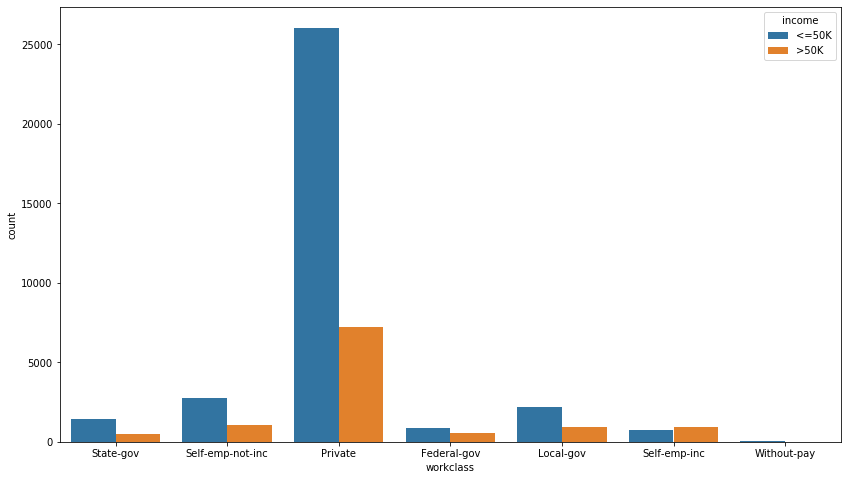

In [25]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="workclass", hue="income", data=df)
plt.show()

### 2.4 Details of 'Race' Attributes 

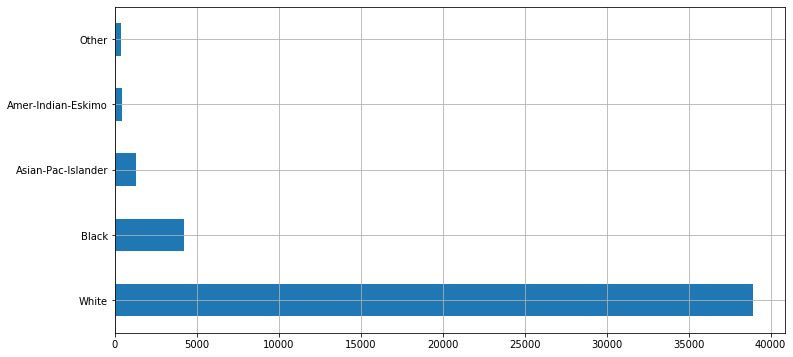

In [26]:
plt.figure(figsize= (12,6))
df['race'].value_counts().plot(kind = 'barh',grid = True)
plt.show()

### 2.5 Which Race is Earning better? 

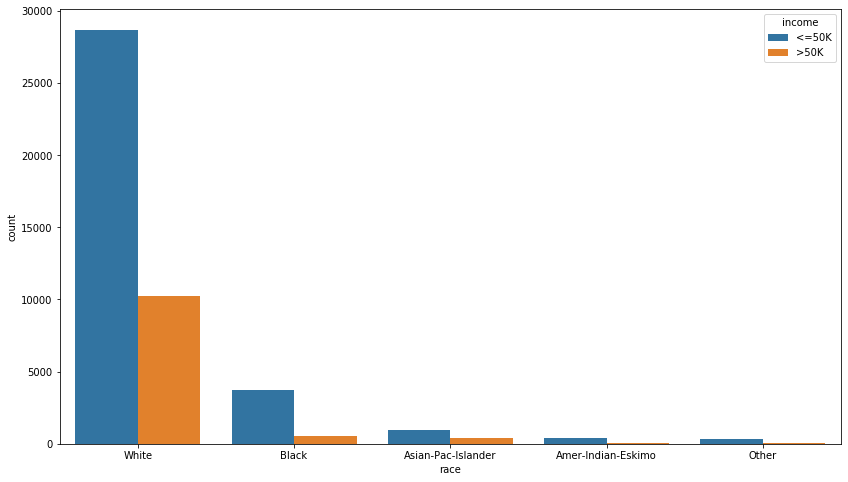

In [27]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="race", hue="income", data=df)
plt.show()

### 2.6 Income Distribution w.r.t Gender 

Male are getting more income as compared to Female

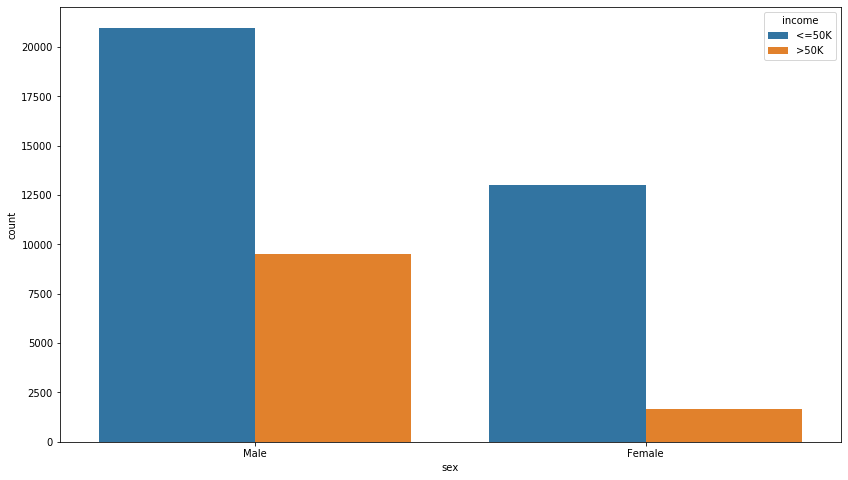

In [29]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="sex", hue="income", data=df)
plt.show()

### 2.7 Statistical Summary of Numerical Features

In [30]:
df.describe()
## Statistical Summary of Numerical Features 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### 2.8 Age Distribution and Relationship with Income
Age is not symmetric. 
Right-skewed since younger adult earn wages – not the older ones

Outliers present in income and age data. 42 years age is earning more than 32 years of age 

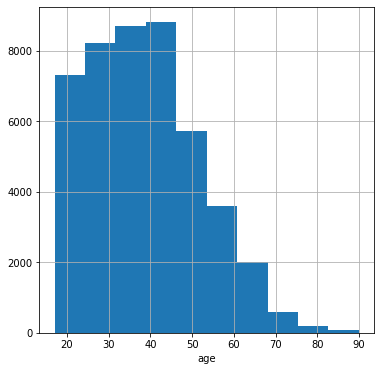

In [31]:
# Age distributions 
df['age'].hist(figsize=(6,6))
plt.xlabel("age")
plt.show()

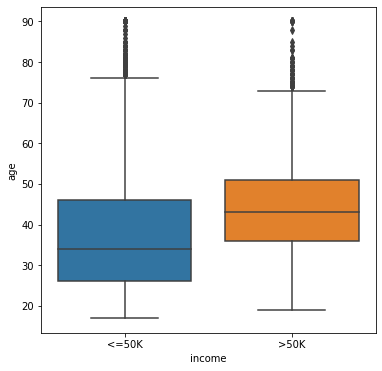

In [32]:
fig = plt.figure(figsize=(6,6)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

### 2.9 Hours-per-Week Distribution and Relationship with Income 

Most people (around 25000) work between 30-40 hours per week and Adults with more hours/week earning more 



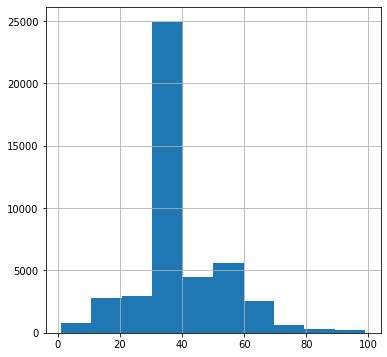

In [33]:
# hours-per-week distributions 
df['hours-per-week'].hist(figsize=(6,6))
plt.show()

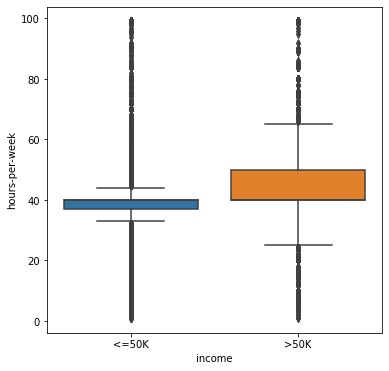

In [34]:
fig = plt.figure(figsize=(6,6)) 
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.show()

### 2.10 Education-Years Distribution and Relationship with Income 

Indicates people with higher number of years are earning more 

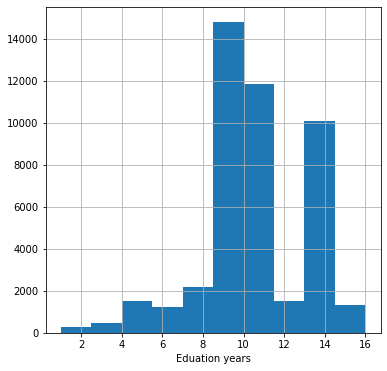

In [35]:
# Education Number 
df['education-num'].hist(figsize=(6,6))
plt.xlabel("Eduation years")
plt.show()

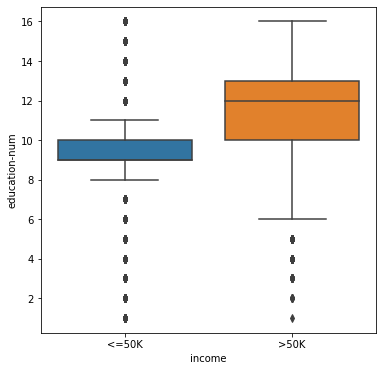

In [36]:
fig = plt.figure(figsize=(6,6)) 
sns.boxplot(x="income", y="education-num", data=df)
plt.show()

### 2.11 Final Weight Distribution and Relationship with Income :D

Weight has no imapct on income -- so eat more and enjoy :) 

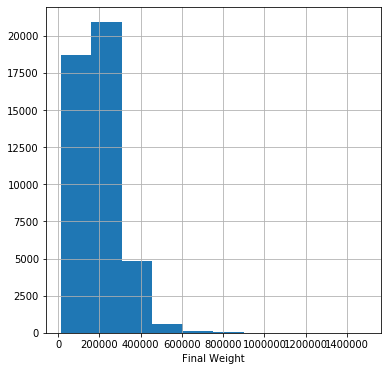

In [37]:
# Final Weight distributions 
df['fnlwgt'].hist(figsize=(6,6))
plt.xlabel("Final Weight")
plt.show()

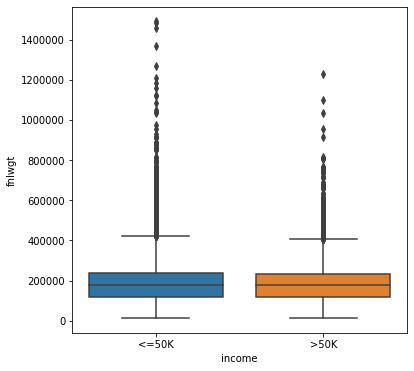

In [38]:
fig = plt.figure(figsize=(6,6)) 
sns.boxplot(x="income", y="fnlwgt", data=df)
plt.show()

### 2.12 Capital-Gain and Capital-Loss 

Capital-gain –  an adult has no gain or has very large gain.

Capital-loss – an adult has no loss or an average loss

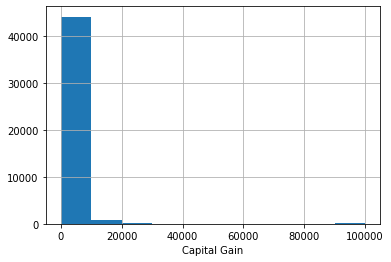

In [39]:
# capital-gain distributions 
df['capital-gain'].hist(figsize=(6,4))
plt.xlabel("Capital Gain")
plt.show()

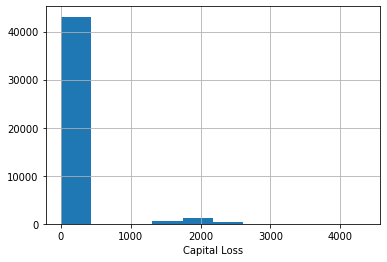

In [40]:
# capital-loss distributions 
df['capital-loss'].hist(figsize=(6,4))
plt.xlabel("Capital Loss")
plt.show()

## 3. Finding Correlation between Features 

In [41]:
df.corr(method ='pearson')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679
education-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000


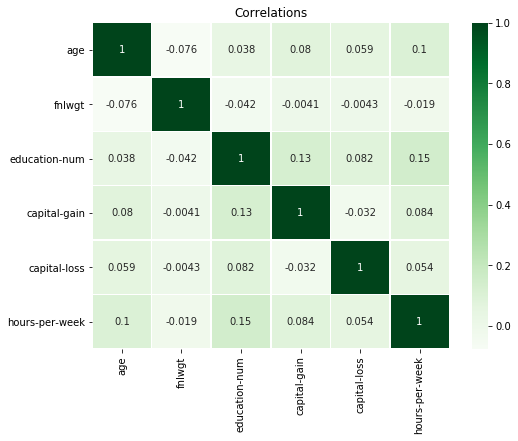

In [42]:
# Ploting Correations +1 indicates strong correlation 
plt.figure(figsize=(8,6))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Greens")
plt.title('Correlations')
plt.show()

## 4. Plotting Feature Imporatance using xgboost 

### 4.1 Conversion of Categorical Features into Numerical Features 

Conversion of Categorical Features into Numerical Features is required since most of ML and DL Algos are not working properly at categorical data 

In [48]:
df = df.apply(LabelEncoder().fit_transform)

In [50]:
########   Conversion into X and y ##################
X = df.iloc[:, :14]
y = df.iloc[:, 14:]

In [51]:
# fit model training data
model = XGBClassifier()
model.fit(X, y)

F:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

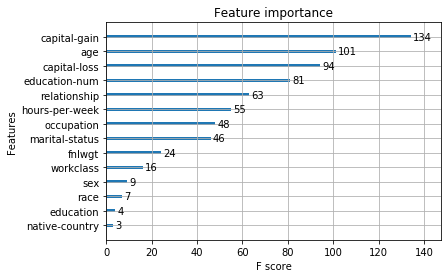

In [55]:
plot_importance(model)

## 5. Checking Accuracy of differrent ML Models 

Checking and comparison of Performance of different ML and DNN models. Following algos are implemented 

1. Xgboost
2. Decision Tree Classifier
3. Logistic Regression 
4. Support Vector Machine 
5. K-Nearest Neighbors

### 5.1 Train and Test Sets (70% and 30%) 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### 5.2 Implementation  of XGBOOST Model 

In [68]:
# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [64]:
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)

In [69]:
print("Accuracy of xgboost: %.2f%%" % (accuracy * 100.0))

Accuracy of xgboost: 86.11%


### 5.3 Implementation of Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
model_DTC = DecisionTreeClassifier()
model_DTC = model_DTC.fit(X_train, y_train)

In [79]:
y_pred_dtc = model_DTC.predict(X_test)
predictions_dtc = [round(value) for value in y_pred_dtc]
accuracy_dtc = accuracy_score(y_test, predictions_dtc)
print("Accuracy of Decision Tree Classifier: %.2f%%" % (accuracy_dtc * 100.0))

Accuracy of Decision Tree Classifier: 80.50%


### 5.4 Implementation of Logistic Regression Classifier

In [75]:
from sklearn.linear_model import LogisticRegression

In [78]:
model_LR = LogisticRegression()
model_LR = model_LR.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
y_pred_lr = model_LR.predict(X_test)
predictions_lr = [round(value) for value in y_pred_lr]
accuracy_lr = accuracy_score(y_test, predictions_lr)
print("Accuracy of Logistic Regression Classifier: %.2f%%" % (accuracy_lr * 100.0))

Accuracy of Logistic Regression Classifier: 80.56%


### 5.4 Implementation of Support Vector Machine Classifier

In [86]:
from sklearn.svm import SVC

In [83]:
model_svm = SVC()
model_svm = model_svm.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [85]:
y_pred_svm = model_svm.predict(X_test)
predictions_svm = [round(value) for value in y_pred_svm]
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("Accuracy of Support Vector Machine Classifier: %.2f%%" % (accuracy_svm * 100.0))

Accuracy of Support Vector Machine Classifier: 75.43%


### 5.5 Implementation of K-Nearest Neighbors Classifier

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
model_knn = KNeighborsClassifier()
model_knn = model_knn.fit(X_train, y_train)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [90]:
y_pred_knn = model_knn.predict(X_test)
predictions_knn = [round(value) for value in y_pred_knn]
accuracy_knn = accuracy_score(y_test, predictions_knn)
print("Accuracy of K Nearest Neighbor Classifier: %.2f%%" % (accuracy_knn * 100.0))

Accuracy of K Nearest Neighbor Classifier: 77.00%


## 6. Performance Comparison of ML Models  

Among all implemented models -- XGBoost Classifier performed best with Accuracy of 86%